In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import math
%matplotlib inline

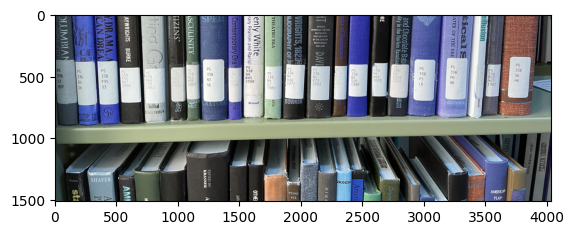

In [2]:
plt.set_cmap('gray')
image = cv2.imread('./test_image3.jpg')
image = image[image.shape[0] // 2: image.shape[0], 0: image.shape[1]]
plt.imshow(image)
image_area = image.shape[0] * image.shape[1]

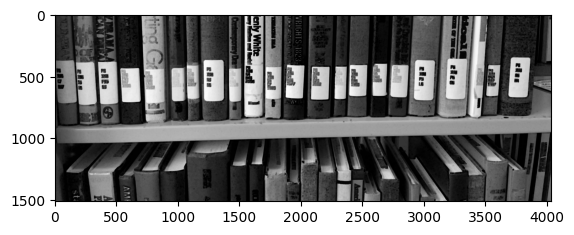

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

size = (10, 10)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)
gray = cv2.erode(gray, kernel)

#gray = cv2.GaussianBlur(gray, (5 ,5), 0)
plt.imshow(gray)

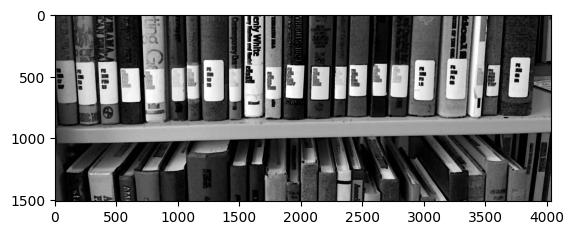

In [4]:
alpha=1.05
beta=0

new_image=cv2.addWeighted(image,alpha,np.zeros(image.shape, image.dtype),0,beta)
gray=cv2.addWeighted(gray,alpha,np.zeros(gray.shape, gray.dtype),0,beta)
plt.imshow(gray)

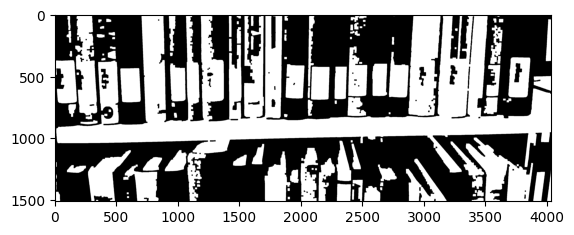

In [5]:
_, thres = cv2.threshold(gray, 60, 65, cv2.THRESH_BINARY)
plt.imshow(thres)

kernel = np.ones((15,15), np.uint8)
thres = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel)
plt.imshow(thres)

## 

True

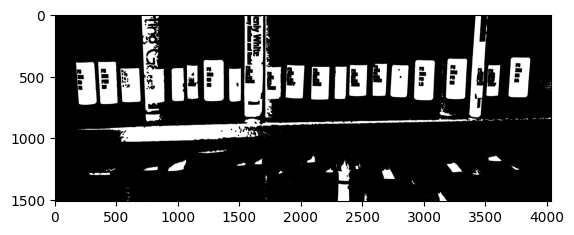

In [6]:
_, thres = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
plt.imshow(thres)
cv2.imwrite('thres.jpg', thres)

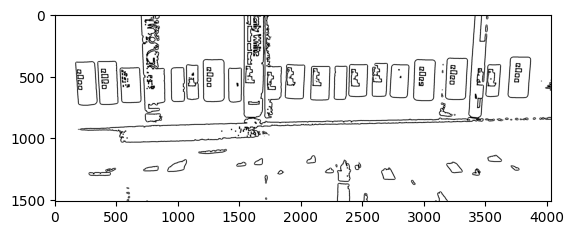

In [7]:
thres1 = cv2.adaptiveThreshold(thres,1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
        cv2.THRESH_BINARY,31,20)
plt.imshow(thres1)

## thres1 = cv2.adaptiveThreshold(thres,1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
            cv2.THRESH_BINARY,31,20)
plt.imshow(thres1)

In [11]:
contours = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:30]
boundingBoxes = [cv2.boundingRect(c) for c in contours]
boundingBoxes = sorted(boundingBoxes, key = lambda k: k[0])

181


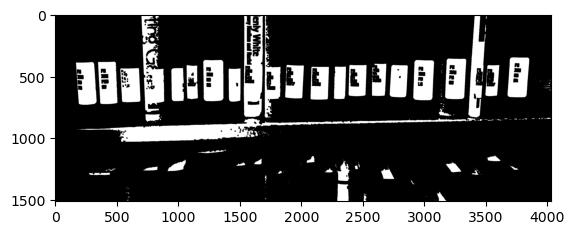

In [9]:
#(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key = lambda k: k[0][0]))
closed = cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB)
plt.imshow(closed)

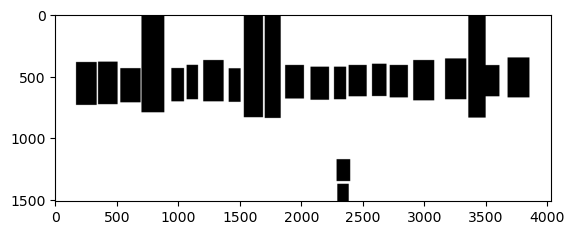

In [10]:
mask = np.ones(closed.shape[:2], dtype = "uint8") * 255
call_numbers = []

for box in boundingBoxes:
    x, y, w, h = box
    #peri = cv2.arcLength(c, True)
    # approx = cv2.approxPolyDP(c, 0.0188 * peri, True)
    #if w * h > image_area * 0.5e-3 and w * h < image_area * 1.5e-1 and (h / w) > 1:   
    if (h / w) > 1:   
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 255, 0), -1)
        img = image[y: y + h, x - 5: x + 5 + w]
        call_numbers.append(img)
        #cv2.drawContours(image, [approx], -1, (255, 0, 0), 3)
plt.imshow(mask)


### plt.imshow(image)

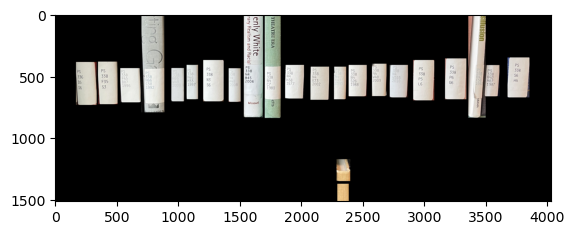

In [11]:
res_final = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
plt.imshow(res_final)


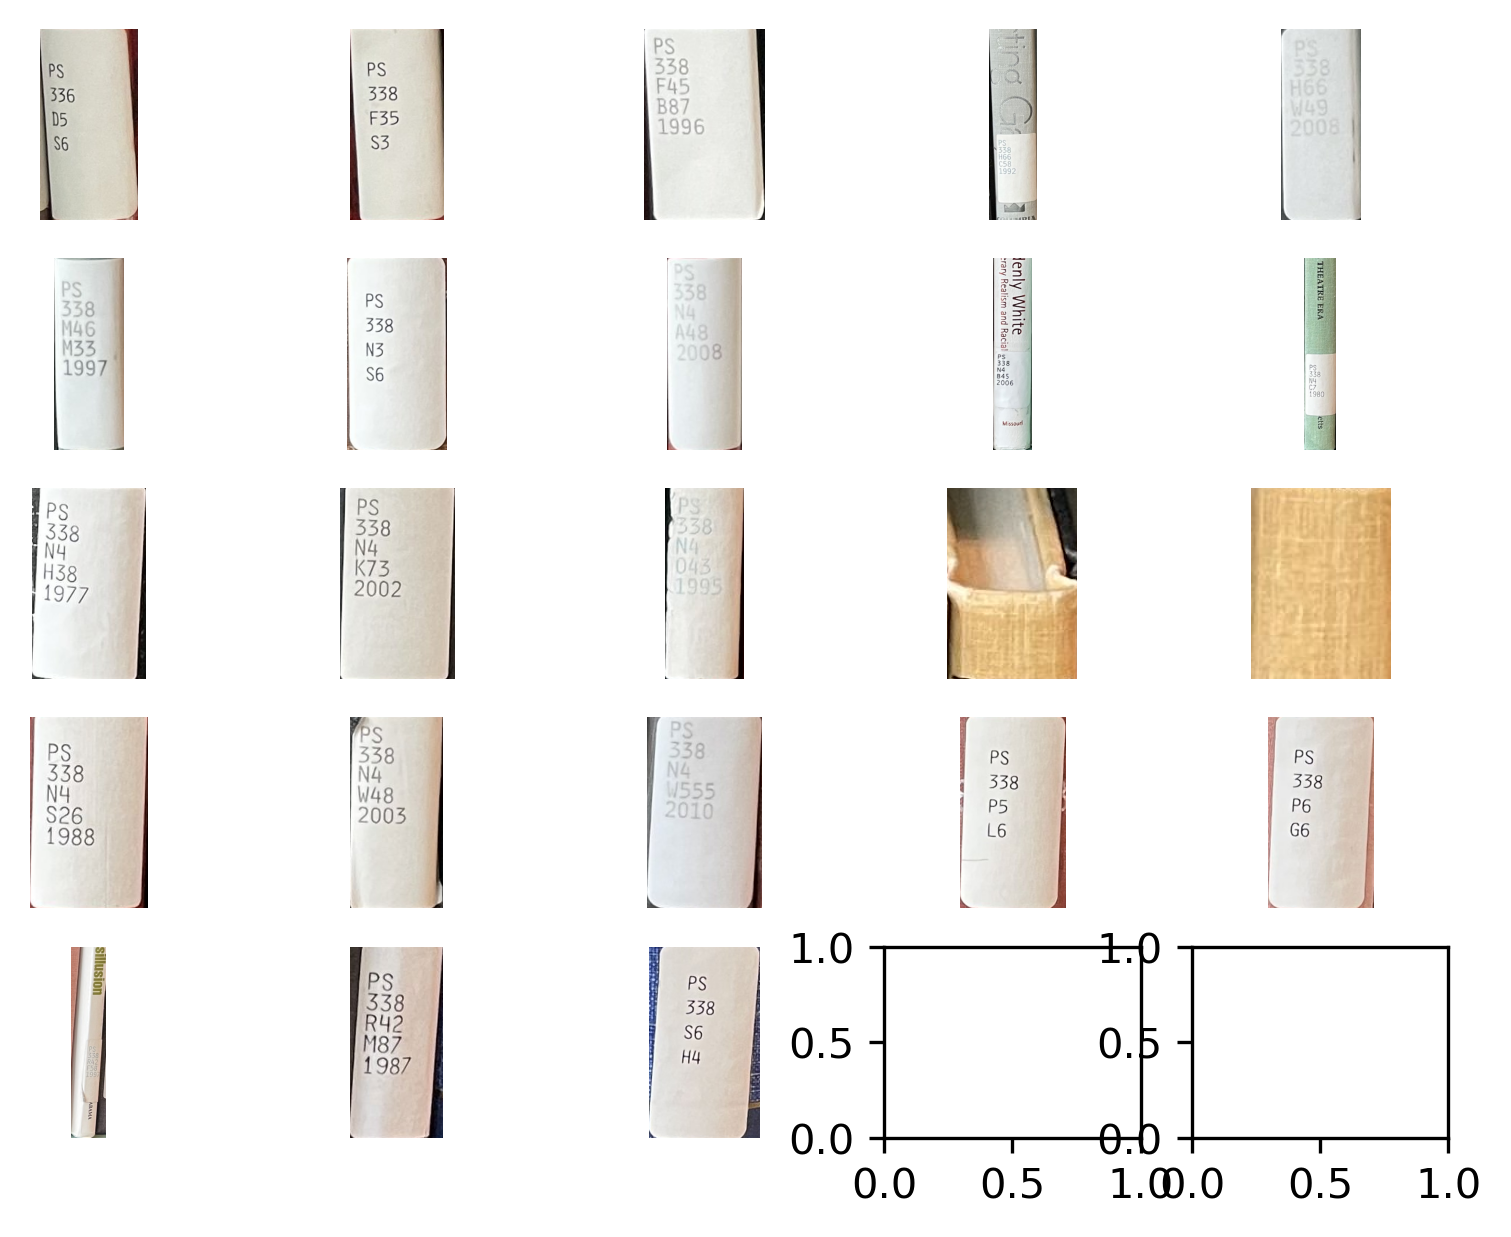

In [12]:
# Create a figure and a subplot
columns = 5
fig, ax = plt.subplots(int(len(call_numbers) / columns) + 1, columns, dpi=300)

for i in range(0, len(call_numbers)):
    img_cell = ax[int(i / columns)][i%columns]
    img_cell.imshow(call_numbers[i])
    img_cell.axis('off')

In [90]:
import pytesseract as pts

In [106]:
img = call_numbers[5]
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

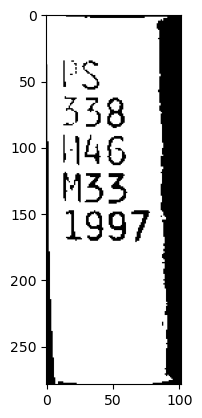

In [117]:
size = (1, 1)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)
gray = cv2.erode(gray, kernel)
#thres = cv2.adaptiveThreshold(gray, 1, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 19, 19)
_, thres = cv2.threshold(gray, 200, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thres)

PS

M&S

M33

1997



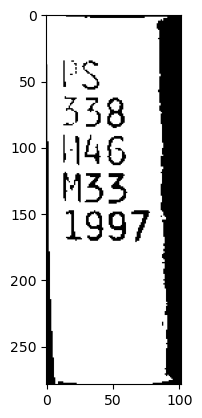

In [110]:
custom_config = r'-l eng --oem 1 --psm 12'
plt.imshow(thres)
text = pts.image_to_string(thres, config = custom_config)
print(text)

## 

(1171, 2082, 3)

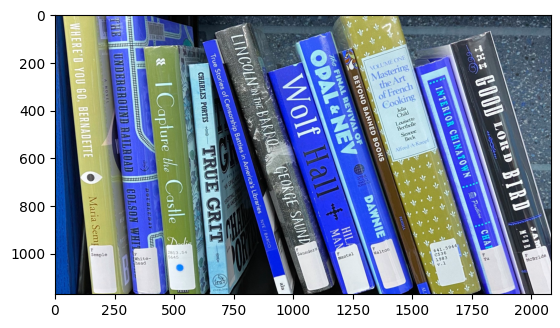

In [17]:
test = 15
image = cv2.imread(f'./test_image{test}.jpg')
plt.imshow(image)
image.shape

In [18]:
delta = 400
count = 0
cropped = []
for i in range(0, image.shape[1], delta):
    endIndex = i + delta
    
    if endIndex > image.shape[1]:
        endIndex = image.shape[1]
    cropped.append(image[:, i : endIndex, :])
    count += 1
    
for i in range(0,len(cropped)):
    cv2.imwrite(f'./datasets/images/data_img_{test}_{i}.jpg', cropped[i])

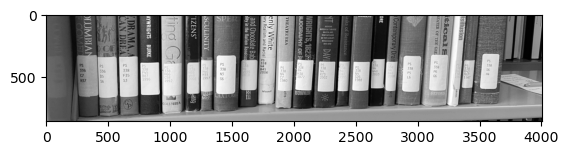

In [ ]:
#method 2
image = cv2.imread('./test_image1.jpg')
image = image[image.shape[0] // 2: image.shape[0], 0: image.shape[1]]

plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (5 ,5), 0)

plt.imshow(gray)

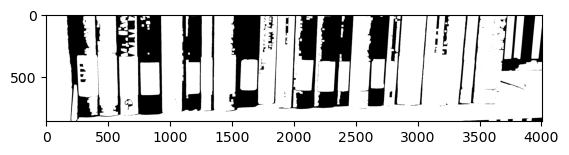

In [1186]:
_, thres = cv2.threshold(gray, 60, 65, cv2.THRESH_BINARY)
plt.imshow(thres)

kernel = np.ones((15,15), np.uint8)
thres = cv2.morphologyEx(thres, cv2.MORPH_OPEN, kernel)
plt.imshow(thres)

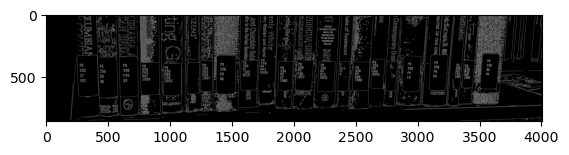

In [1187]:
edges = cv2.Canny(gray, 50, 100, apertureSize = 3)
plt.imshow(edges)

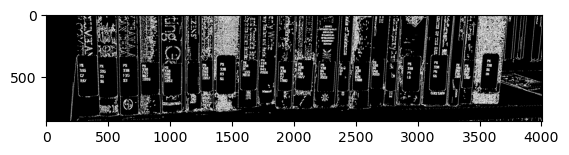

In [1188]:
sobel_edge_x = cv2.Sobel(edges, cv2.CV_16S, 1, 0, ksize = 3, delta = 0, borderType = cv2.BORDER_DEFAULT)
sobel_edge_y = cv2.Sobel(edges, cv2.CV_16S, 0, 1, ksize = 3, delta = 0, borderType = cv2.BORDER_DEFAULT)
abs_sobel_edge_x = cv2.convertScaleAbs(sobel_edge_x)
abs_sobel_edge_y = cv2.convertScaleAbs(sobel_edge_y)

sobel_edge = cv2.addWeighted(abs_sobel_edge_x, 0.5, abs_sobel_edge_y, 0.5, 0);

plt.imshow(abs_sobel_edge_x)

In [1189]:
lines = cv2.HoughLines(abs_sobel_edge_x, 10, np.pi / 180, 100)
if lines is not None:
    for line in lines:
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
            

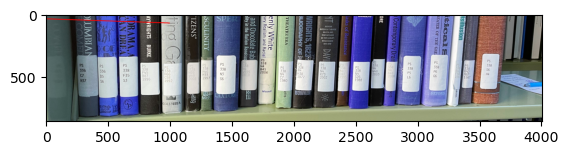

In [1190]:
plt.imshow(image)